## TEAM AIRy - Tugas Khusus DSA COMPFEST 15

Nama Anggota:

> Muhammad Alvero Johansyah

> M.Irfansyah

> Rifki Prakasya

## Data Assessment & Preprocessing

### Data Observation (Data Kejadian Banjir Jakarta 2020)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
januari = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv')
februari = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-februari.csv')
maret = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-maret.csv')
april = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-april.csv')
mei = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-mei.csv')
juni = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juni.csv')
juli = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-juli.csv')
agustus = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-agustus.csv')
september = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-september.csv')
oktober = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-oktober.csv')
november = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-november.csv')
desember = pd.read_csv('data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-desember.csv')

In [ ]:
# List DataFrame yang sudah Anda baca
dataframes = [januari, februari, maret, april, mei, juni, juli, agustus, oktober, november]

# Menggabungkan DataFrame menjadi satu DataFrame
df = pd.concat(dataframes)

# Reset indeks DataFrame yang telah digabungkan
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Jakarta Timur,KRAMAT JATI,BALEKAMBANG,RW : 03,1,1,0,0,20 cm,2020-11-08,0,0,0,0,0,0,0,0
927,Jakarta Timur,KRAMAT JATI,CAWANG,RW : 03,1,1,0,0,50 cm,2020-11-12,0,0,0,0,0,0,0,0
928,Jakarta Timur,KRAMAT JATI,CAWANG,RW : 05,1,1,0,0,30 cm,2020-11-12,0,0,0,0,0,0,0,0
929,Jakarta Timur,KRAMAT JATI,CAWANG,0,0,1,0,0,30 cm,2020-11-12,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           931 non-null    object
 1   kecamatan                   931 non-null    object
 2   kelurahan                   931 non-null    object
 3   rw                          931 non-null    object
 4   jumlah_terdampak_rw         931 non-null    int64 
 5   jumlah_terdampak_rt         931 non-null    int64 
 6   jumlah_terdampak_kk         931 non-null    object
 7   jumlah_terdampak_jiwa       931 non-null    int64 
 8   ketinggian_air              931 non-null    object
 9   tanggal_kejadian            931 non-null    object
 10  lama_genangan               931 non-null    int64 
 11  jumlah_meninggal            931 non-null    int64 
 12  jumlah_hilang               931 non-null    int64 
 13  jumlah_luka_berat           931 non-null    int64 

In [ ]:
df.columns

Index(['kota_administrasi', 'kecamatan', 'kelurahan', 'rw',
       'jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
       'jumlah_terdampak_jiwa', 'ketinggian_air', 'tanggal_kejadian',
       'lama_genangan', 'jumlah_meninggal', 'jumlah_hilang',
       'jumlah_luka_berat', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi',
       'jumlah_tempat_pengungsian', 'nilai_kerugian'],
      dtype='object')

In [ ]:
df.shape

(931, 18)

In [ ]:
df.head()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0


In [ ]:
df.tail()

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
926,Jakarta Timur,KRAMAT JATI,BALEKAMBANG,RW : 03,1,1,0,0,20 cm,2020-11-08,0,0,0,0,0,0,0,0
927,Jakarta Timur,KRAMAT JATI,CAWANG,RW : 03,1,1,0,0,50 cm,2020-11-12,0,0,0,0,0,0,0,0
928,Jakarta Timur,KRAMAT JATI,CAWANG,RW : 05,1,1,0,0,30 cm,2020-11-12,0,0,0,0,0,0,0,0
929,Jakarta Timur,KRAMAT JATI,CAWANG,0,0,1,0,0,30 cm,2020-11-12,0,0,0,0,0,0,0,0
930,Jakarta Timur,PASAR REBO,GEDONG,RW : 010,1,1,0,0,20 cm,2020-11-25,0,0,0,0,0,0,0,0


In [ ]:
df.isna().sum()

kota_administrasi             0
kecamatan                     0
kelurahan                     0
rw                            0
jumlah_terdampak_rw           0
jumlah_terdampak_rt           0
jumlah_terdampak_kk           0
jumlah_terdampak_jiwa         0
ketinggian_air                0
tanggal_kejadian              0
lama_genangan                 0
jumlah_meninggal              0
jumlah_hilang                 0
jumlah_luka_berat             0
jumlah_luka_ringan            0
jumlah_pengungsi_tertinggi    0
jumlah_tempat_pengungsian     0
nilai_kerugian                0
dtype: int64

In [ ]:
df.sum()

<ipython-input-426-7e5fdb616c56>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.sum()


kota_administrasi             Jakarta PusatJakarta PusatJakarta PusatJakarta...
kecamatan                     JOHAR BARUKEMAYORANKEMAYORANSAWAH BESARTANAH A...
kelurahan                     JOHAR BARUGUNUNG SAHARI SELATANSERDANGPASAR BA...
rw                            RW 01, 02, 06, 08RW 01, 02, 07, 08RW 01, 02, 0...
jumlah_terdampak_rw                                                        1783
jumlah_terdampak_rt                                                        3256
jumlah_terdampak_jiwa                                                    148898
ketinggian_air                10 s/d 30 cm10 s/d 70 cm10 s/d 30 cm10 s/d 70 ...
tanggal_kejadian              tgl. 01 Januaritgl. 01 Januaritgl. 01 Januarit...
lama_genangan                                                                19
jumlah_meninggal                                                              0
jumlah_hilang                                                                 0
jumlah_luka_berat                       

In [ ]:
df.duplicated().sum()

77

In [ ]:
df.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,931.000000,931.000000,931.000000,931.000000,931.0,931.0,931.0,931.000000,931.000000,931.000000,931.0
mean,1.915145,3.497315,159.933405,0.020408,0.0,0.0,0.0,96.831364,1.425349,0.012889,0.0
std,2.396300,5.497482,706.077628,0.155930,0.0,0.0,0.0,372.279960,11.050109,0.146079,0.0
min,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
75%,2.000000,3.000000,16.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
max,15.000000,46.000000,13450.000000,2.000000,0.0,0.0,0.0,4461.000000,271.000000,3.000000,0.0


### Data Cleaning

In [ ]:
# Menghapus data duplikat dari DataFrame
df.drop_duplicates(inplace=True)

# Reset indeks DataFrame setelah menghapus duplikat
df.reset_index(drop=True, inplace=True)

In [ ]:
df.duplicated().sum() #mengecek kembali data yang duplikat

0

In [ ]:
df = df.drop(columns=['jumlah_meninggal', 'jumlah_hilang', 'jumlah_luka_berat', 'nilai_kerugian', 'tanggal_kejadian', 'rw', 'kecamatan', 'kelurahan'], axis=1)
# menghapus kolom yang 100% kosong / tidak memiliki nilai / tidak begitu penting

In [ ]:
import re

# Membuat fungsi untuk mendapatkan rata-rata dari string ketinggian air
def get_average_height(height_str):
    # Menggunakan regular expression untuk mengekstraksi angka dari string
    heights = re.findall(r'\d+', height_str)
    # Mengubah angka menjadi tipe integer
    heights = [int(height) for height in heights]
    # Menghitung rata-rata ketinggian air
    average_height = sum(heights) / len(heights)
    return average_height

# Menggunakan fungsi get_average_height untuk mengubah fitur ketinggian air menjadi numerik
df['ketinggian_air'] = df['ketinggian_air'].apply(get_average_height)

In [ ]:
df['ketinggian_air'] = df['ketinggian_air'].astype('int64')

In [ ]:
import numpy as np

df['jumlah_terdampak_kk'] = pd.to_numeric(df['jumlah_terdampak_kk'], errors='coerce').fillna(0).astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           854 non-null    object
 1   jumlah_terdampak_rw         854 non-null    int64 
 2   jumlah_terdampak_rt         854 non-null    int64 
 3   jumlah_terdampak_kk         854 non-null    int64 
 4   jumlah_terdampak_jiwa       854 non-null    int64 
 5   ketinggian_air              854 non-null    int64 
 6   lama_genangan               854 non-null    int64 
 7   jumlah_luka_ringan          854 non-null    int64 
 8   jumlah_pengungsi_tertinggi  854 non-null    int64 
 9   jumlah_tempat_pengungsian   854 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 66.8+ KB


In [ ]:
df.sum()

kota_administrasi             Jakarta PusatJakarta PusatJakarta PusatJakarta...
jumlah_terdampak_rw                                                        1783
jumlah_terdampak_rt                                                        3179
jumlah_terdampak_kk                                                       41666
jumlah_terdampak_jiwa                                                    148898
ketinggian_air                                                            36580
lama_genangan                                                                19
jumlah_luka_ringan                                                        90150
jumlah_pengungsi_tertinggi                                                 1327
jumlah_tempat_pengungsian                                                    12
dtype: object

In [ ]:
# Mengetahui data unik dari kota administrasi

unique_data = df['kota_administrasi'].unique()
print(unique_data)

['Jakarta Pusat' 'Jakarta Utara' 'Jakarta Barat' 'Jakarta Selatan'
 'Jakarta Timur' 'Kepulauan Seribu' 'Jakarta Urata']


In [ ]:
df['kota_administrasi'] = df['kota_administrasi'].replace('Jakarta Urata', 'Jakarta Utara') #replace data yang typo

In [ ]:
# Mengetahui data unik dari kota administrasi

unique_data = df['kota_administrasi'].unique()
print(unique_data)

['Jakarta Pusat' 'Jakarta Utara' 'Jakarta Barat' 'Jakarta Selatan'
 'Jakarta Timur' 'Kepulauan Seribu']


In [ ]:
#Hapus Kota Administrasi Kepulauan Seribu
df = df[df['kota_administrasi'] != 'Kepulauan Seribu']

In [ ]:
df.shape

(848, 10)

In [ ]:
# MEMBUAT DATAFRAME JUMLAH PENDUDUK JAKARTA 2020 BERDASARKAN KOTA ADMINISTRASI

data = {
    'Kota Administrasi': ['Jakarta Selatan', 'Jakarta Timur', 'Jakarta Pusat', 'Jakarta Barat', 'Jakarta Utara'],
    'Jumlah Penduduk': [2226812, 3037139, 1056896, 2434511, 1778981]
}

df_penduduk = pd.DataFrame(data)

#SUMBER: https://jakarta.bps.go.id/indicator/12/1270/1/jumlah-penduduk-menurut-kabupaten-kota-di-provinsi-dki-jakarta-.html

In [ ]:
df

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,lama_genangan,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,Jakarta Pusat,4,4,35,140,20,0,140,1,0
1,Jakarta Pusat,4,4,0,0,40,0,0,0,0
2,Jakarta Pusat,4,4,0,0,20,1,0,0,0
3,Jakarta Pusat,7,7,155,625,40,0,625,5,0
4,Jakarta Pusat,2,2,52,195,50,0,195,6,0
...,...,...,...,...,...,...,...,...,...,...
849,Jakarta Timur,1,1,0,0,20,0,0,0,0
850,Jakarta Timur,1,1,0,0,50,0,0,0,0
851,Jakarta Timur,1,1,0,0,30,0,0,0,0
852,Jakarta Timur,0,1,0,0,30,0,0,0,0


In [ ]:
df_penduduk

,Kota Administrasi,Jumlah Penduduk
0,Jakarta Selatan,2226812
1,Jakarta Timur,3037139
2,Jakarta Pusat,1056896
3,Jakarta Barat,2434511
4,Jakarta Utara,1778981


In [ ]:
mapping = {
    'Jakarta Selatan': 2226812,
    'Jakarta Timur': 3037139,
    'Jakarta Pusat': 1056896,
    'Jakarta Barat': 2434511,
    'Jakarta Utara': 1778981
}

df['jumlah_penduduk'] = df['kota_administrasi'].replace(mapping)

<ipython-input-445-6214c9b75551>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jumlah_penduduk'] = df['kota_administrasi'].replace(mapping)


In [ ]:
df

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,lama_genangan,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_penduduk
0,Jakarta Pusat,4,4,35,140,20,0,140,1,0,1056896
1,Jakarta Pusat,4,4,0,0,40,0,0,0,0,1056896
2,Jakarta Pusat,4,4,0,0,20,1,0,0,0,1056896
3,Jakarta Pusat,7,7,155,625,40,0,625,5,0,1056896
4,Jakarta Pusat,2,2,52,195,50,0,195,6,0,1056896
...,...,...,...,...,...,...,...,...,...,...,...
849,Jakarta Timur,1,1,0,0,20,0,0,0,0,3037139
850,Jakarta Timur,1,1,0,0,50,0,0,0,0,3037139
851,Jakarta Timur,1,1,0,0,30,0,0,0,0,3037139
852,Jakarta Timur,0,1,0,0,30,0,0,0,0,3037139


In [ ]:
df['jumlah_penduduk'].unique()

array([1056896, 1778981, 2434511, 2226812, 3037139])

In [ ]:
#Mengecek outlier

from scipy import stats

# Menghitung z-score untuk setiap kolom numerik dalam dataframe
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Menentukan batas z-score untuk mengidentifikasi outlier
threshold = 3

# Menampilkan data yang dianggap sebagai outlier
outliers = df[(z_scores > threshold).any(axis=1)]
print(outliers)


    kota_administrasi  jumlah_terdampak_rw  jumlah_terdampak_rt  \
2       Jakarta Pusat                    4                    4   
5       Jakarta Pusat                    8                   31   
6       Jakarta Pusat                    2                    2   
7       Jakarta Utara                    3                   21   
9       Jakarta Utara                    5                    5   
..                ...                  ...                  ...   
609   Jakarta Selatan                    1                    1   
633     Jakarta Timur                    1                    1   
720     Jakarta Timur                    1                    1   
727     Jakarta Timur                    0                    1   
731     Jakarta Timur                    0                    1   

     jumlah_terdampak_kk  jumlah_terdampak_jiwa  ketinggian_air  \
2                      0                      0              20   
5                    535                   2078             1

In [ ]:
#Menghapus Outlier

df = df[(z_scores <= threshold).all(axis=1)]

In [ ]:
df.shape

(769, 11)

In [ ]:
df.sum() #dapat dilihat lama genangan dan jumlah tempat pengungsian bernilai 0

kota_administrasi             Jakarta PusatJakarta PusatJakarta PusatJakarta...
jumlah_terdampak_rw                                                        1267
jumlah_terdampak_rt                                                        1986
jumlah_terdampak_kk                                                       13322
jumlah_terdampak_jiwa                                                     49361
ketinggian_air                                                            30745
lama_genangan                                                                 0
jumlah_luka_ringan                                                        31250
jumlah_pengungsi_tertinggi                                                  361
jumlah_tempat_pengungsian                                                     0
jumlah_penduduk                                                      1898793041
dtype: object

In [ ]:
df = df.drop(columns=['lama_genangan', 'jumlah_tempat_pengungsian'], axis=1) #hapus lama genangan dan jumlah tempat pengungsian

In [ ]:
#cek outlier lagi

# Menghitung z-score untuk setiap kolom numerik dalam dataframe
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Menentukan batas z-score untuk mengidentifikasi outlier
threshold = 3

# Menampilkan data yang dianggap sebagai outlier
outliers = df[(z_scores > threshold).any(axis=1)]
outliers.shape

(75, 9)

In [ ]:
#Menghapus Outlier lagi

df = df[(z_scores <= threshold).all(axis=1)]

In [ ]:
#cek outlier lagi

# Menghitung z-score untuk setiap kolom numerik dalam dataframe
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Menentukan batas z-score untuk mengidentifikasi outlier
threshold = 5

# Menampilkan data yang dianggap sebagai outlier
outliers = df[(z_scores > threshold).any(axis=1)]
outliers.shape

(21, 9)

In [ ]:
#Menghapus Outlier lagi

df = df[(z_scores <= threshold).all(axis=1)]

In [ ]:
df.sum()

kota_administrasi             Jakarta PusatJakarta PusatJakarta UtaraJakarta...
jumlah_terdampak_rw                                                         850
jumlah_terdampak_rt                                                        1284
jumlah_terdampak_kk                                                        2814
jumlah_terdampak_jiwa                                                      8941
ketinggian_air                                                            24767
jumlah_luka_ringan                                                         4275
jumlah_pengungsi_tertinggi                                                   61
jumlah_penduduk                                                      1665970967
dtype: object

In [ ]:
df.columns

Index(['kota_administrasi', 'jumlah_terdampak_rw', 'jumlah_terdampak_rt',
       'jumlah_terdampak_kk', 'jumlah_terdampak_jiwa', 'ketinggian_air',
       'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi', 'jumlah_penduduk'],
      dtype='object')

##EDA

<ipython-input-459-decae7ffbc22>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,lw=1)


Text(0.5, 1.0, 'Heatplot for features')

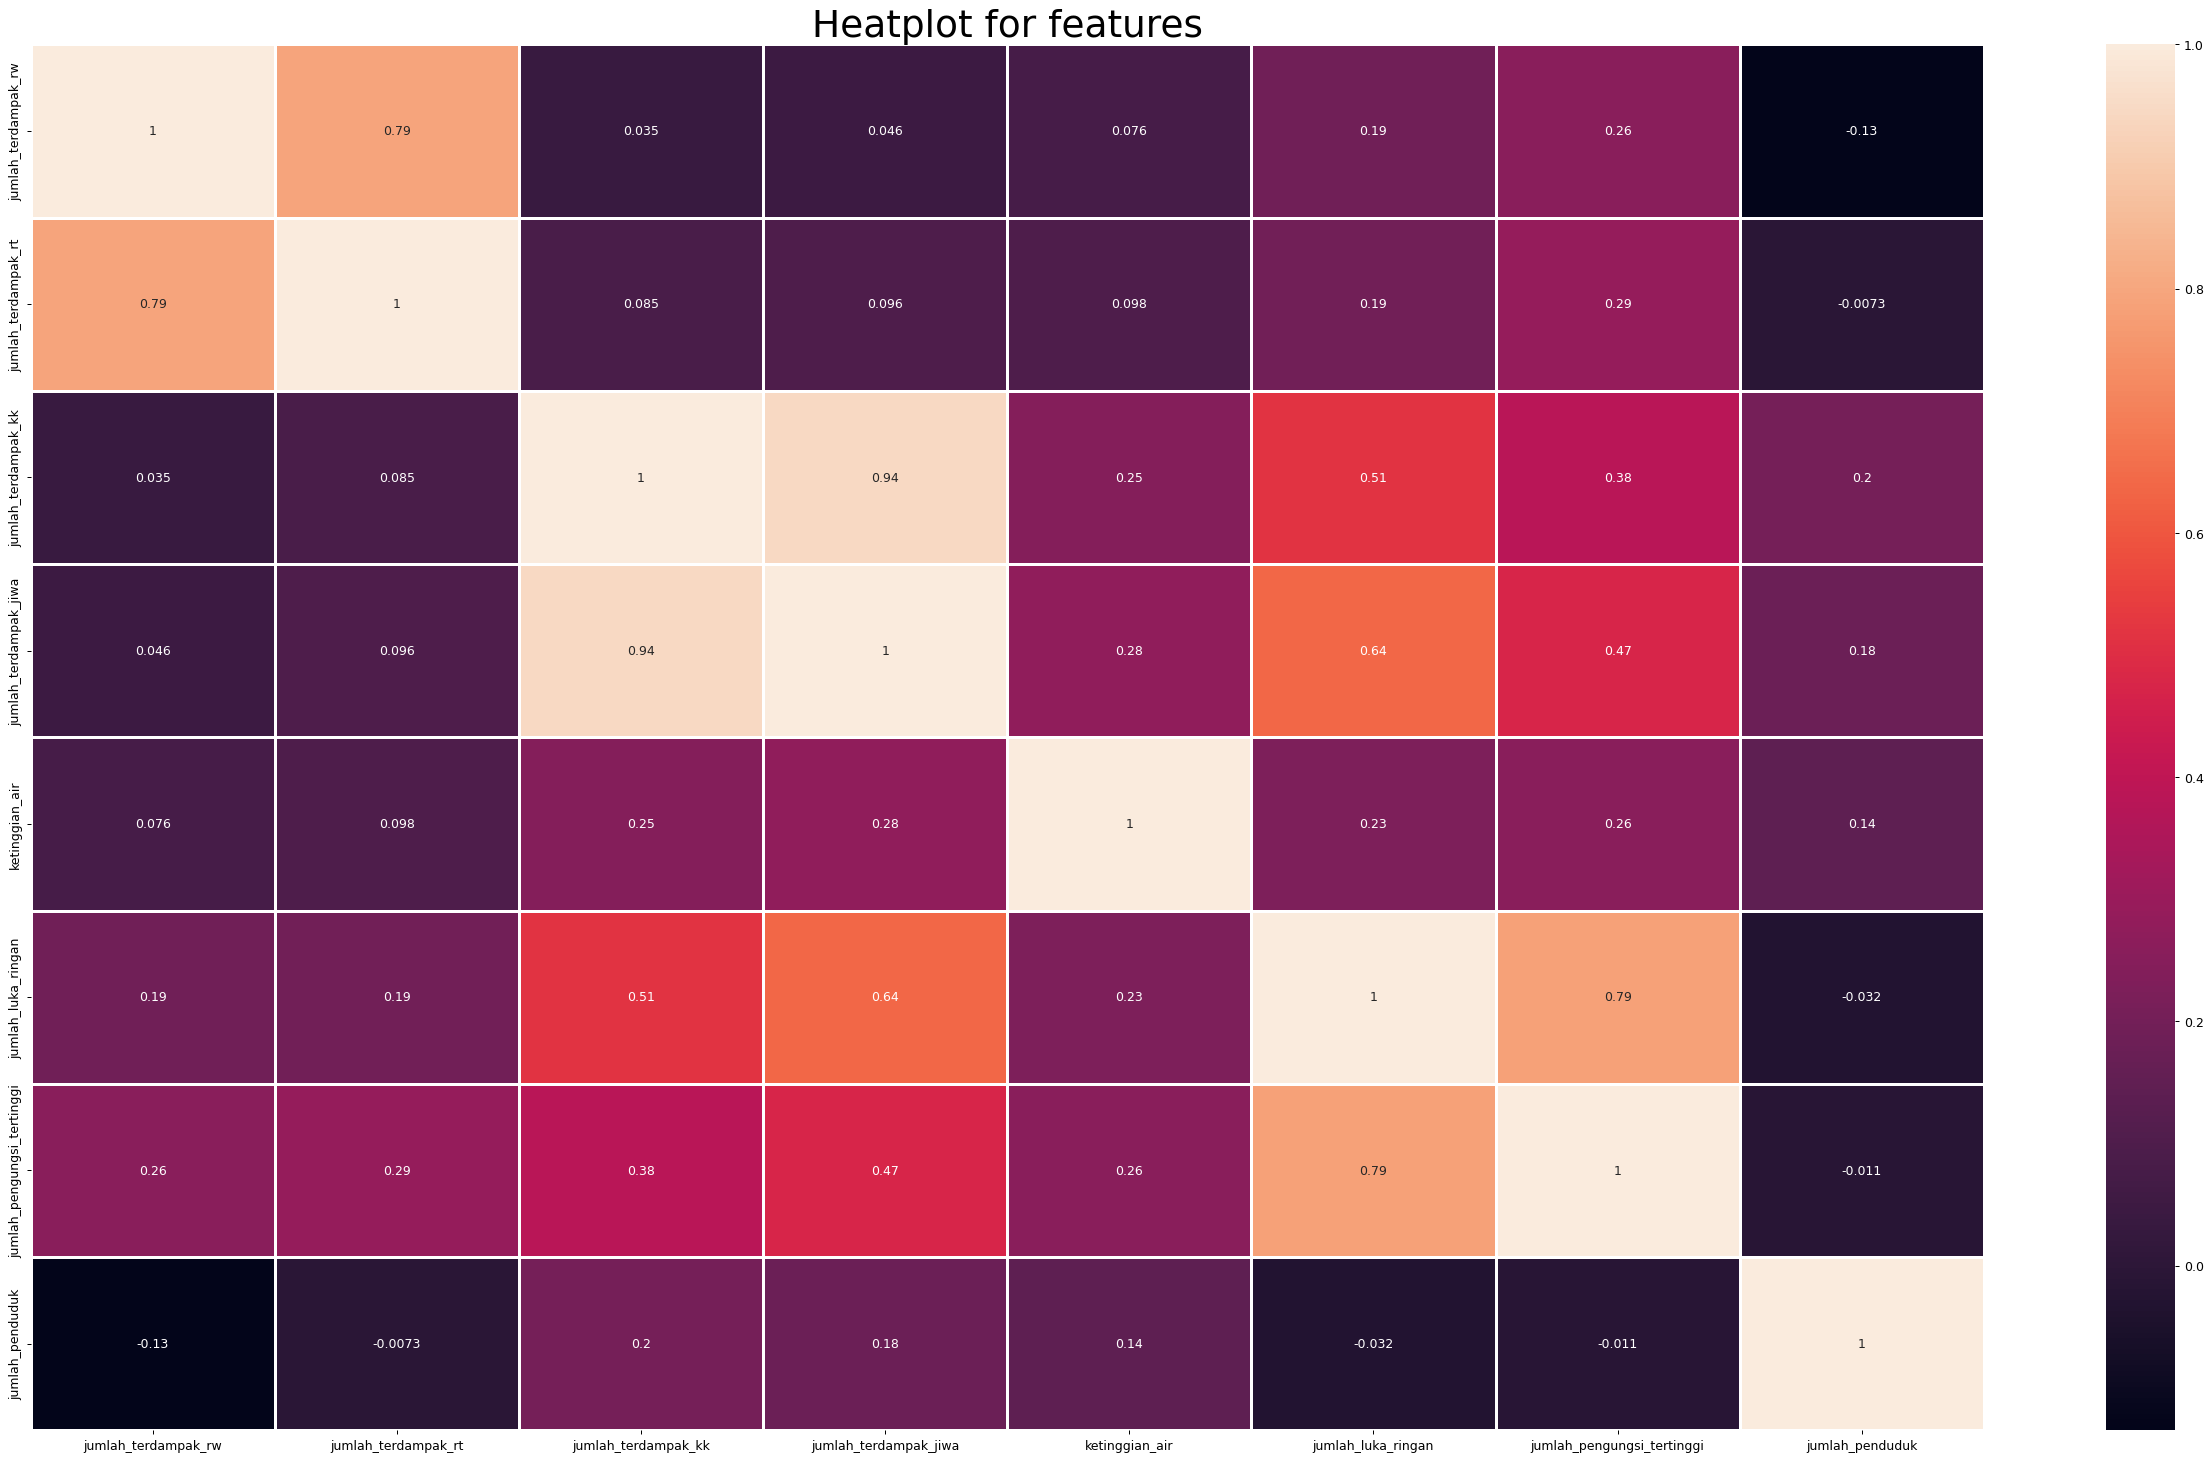

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 20), dpi=90)
sns.heatmap(df.corr(),annot=True,lw=1)
plt.title('Heatplot for features', fontsize=30)

array([[<Axes: title={'center': 'jumlah_terdampak_rw'}>,
        <Axes: title={'center': 'jumlah_terdampak_rt'}>,
        <Axes: title={'center': 'jumlah_terdampak_kk'}>],
       [<Axes: title={'center': 'jumlah_terdampak_jiwa'}>,
        <Axes: title={'center': 'ketinggian_air'}>,
        <Axes: title={'center': 'jumlah_luka_ringan'}>],
       [<Axes: title={'center': 'jumlah_pengungsi_tertinggi'}>,
        <Axes: title={'center': 'jumlah_penduduk'}>, <Axes: >]],
      dtype=object)

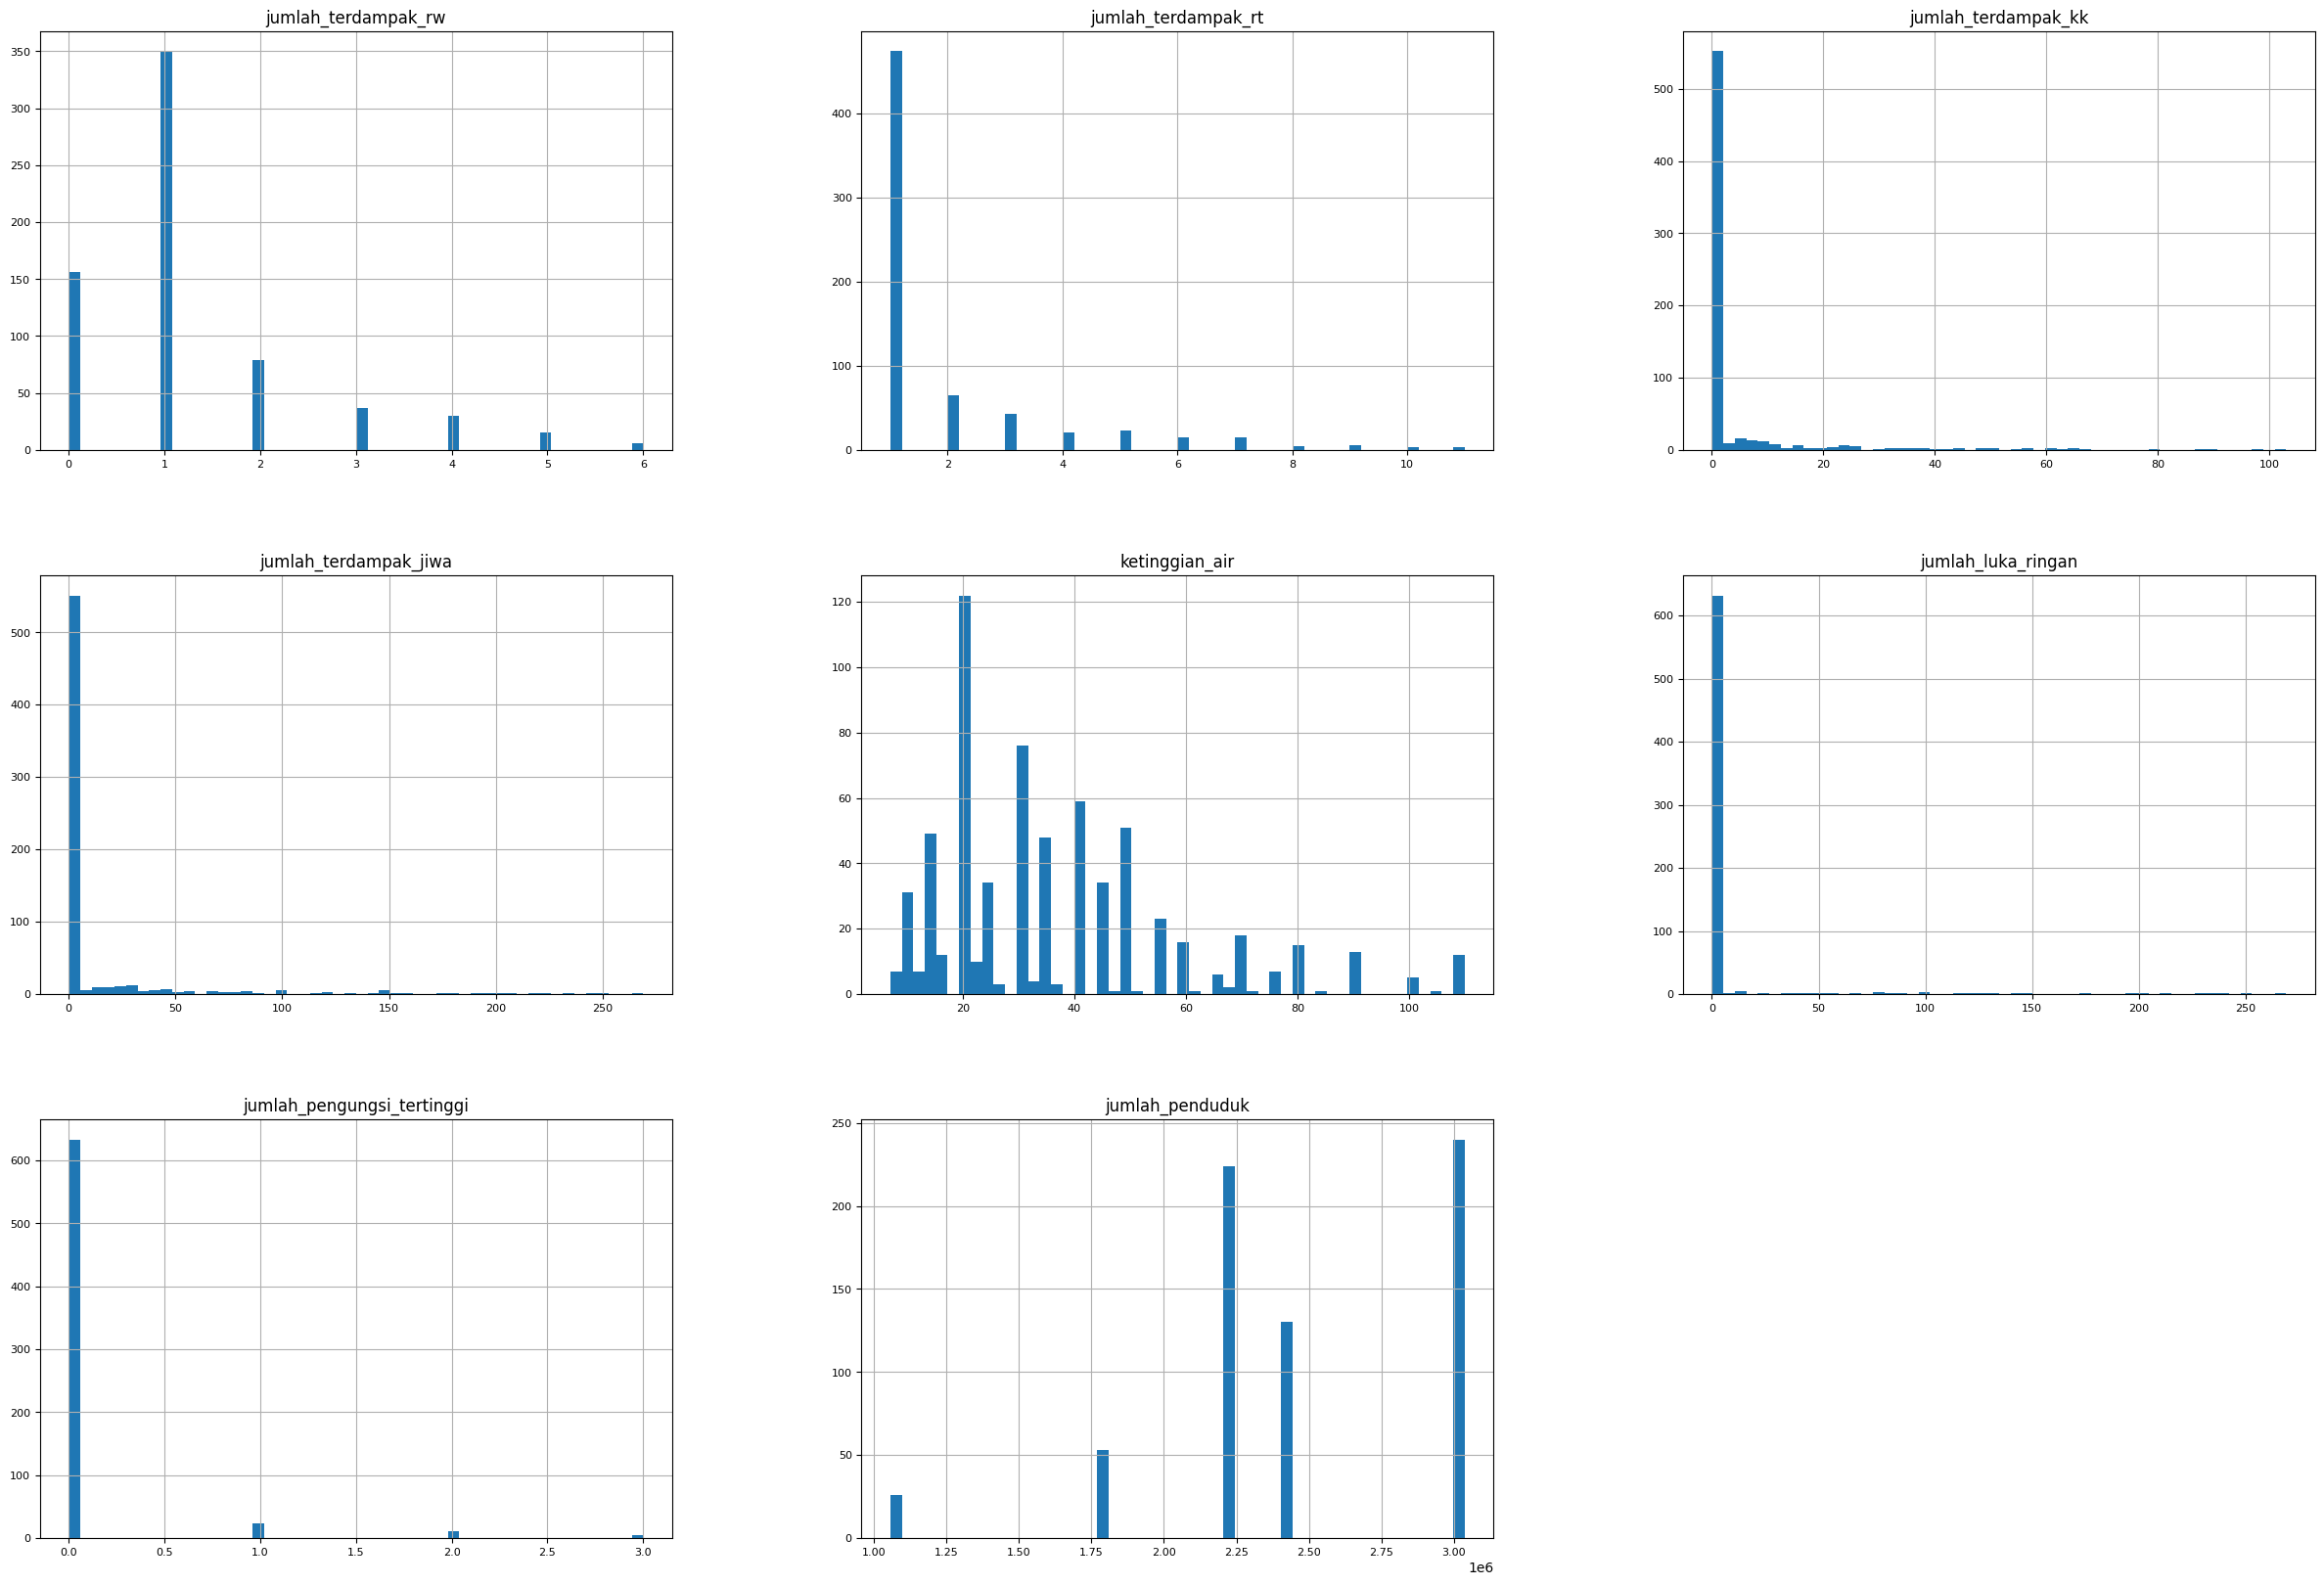

In [ ]:
df_hist = df.select_dtypes(include=np.number)
df_hist.hist(figsize=(30, 20), bins=50, xlabelsize=8, ylabelsize=8)

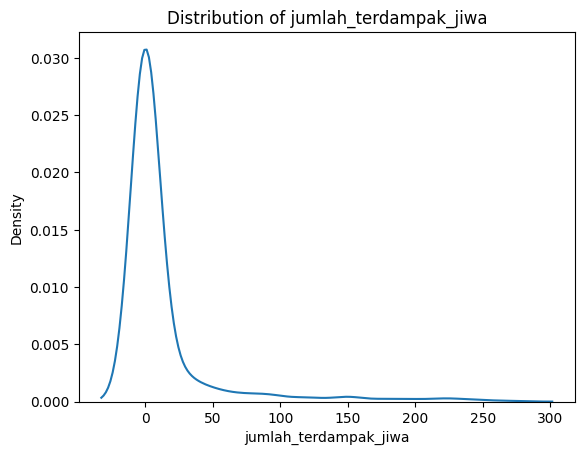

In [ ]:
# Plot KDE plot for Jumlah Terdampak kk
sns.kdeplot(df['jumlah_terdampak_jiwa'])
plt.xlabel('jumlah_terdampak_jiwa')
plt.ylabel('Density')
plt.title('Distribution of jumlah_terdampak_jiwa')
plt.show()

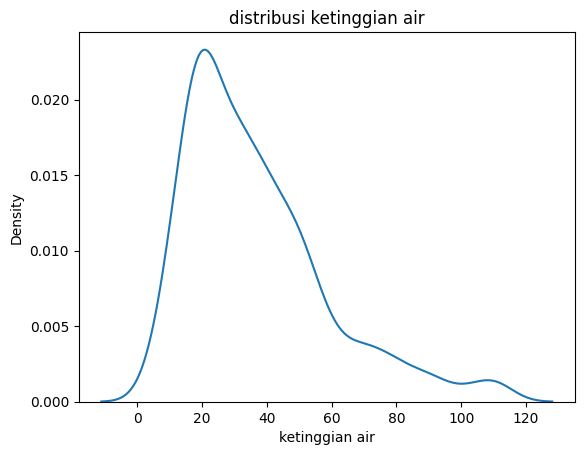

In [ ]:
# Plot KDE plot for Jumlah Terdampak kk
sns.kdeplot(df['ketinggian_air'])
plt.xlabel('ketinggian air')
plt.ylabel('Density')
plt.title('distribusi ketinggian air')
plt.show()

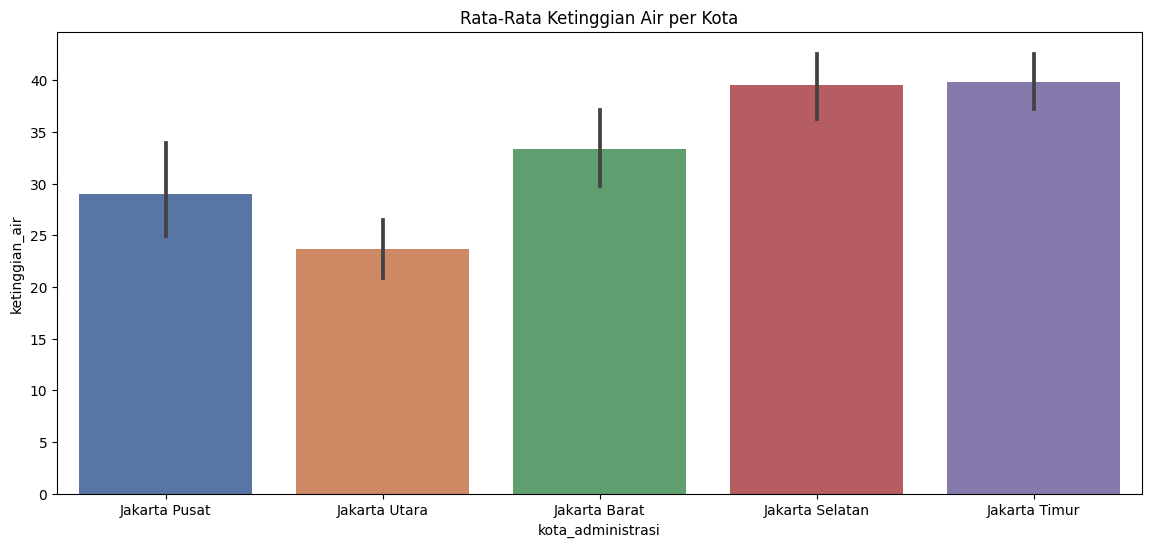

In [ ]:
plt.figure(figsize=(14,6))

sns.barplot(data=df, x='kota_administrasi', y='ketinggian_air',
            palette=sns.color_palette('deep'))
plt.ylabel('ketinggian_air')
plt.title('Rata-Rata Ketinggian Air per Kota')
plt.show()

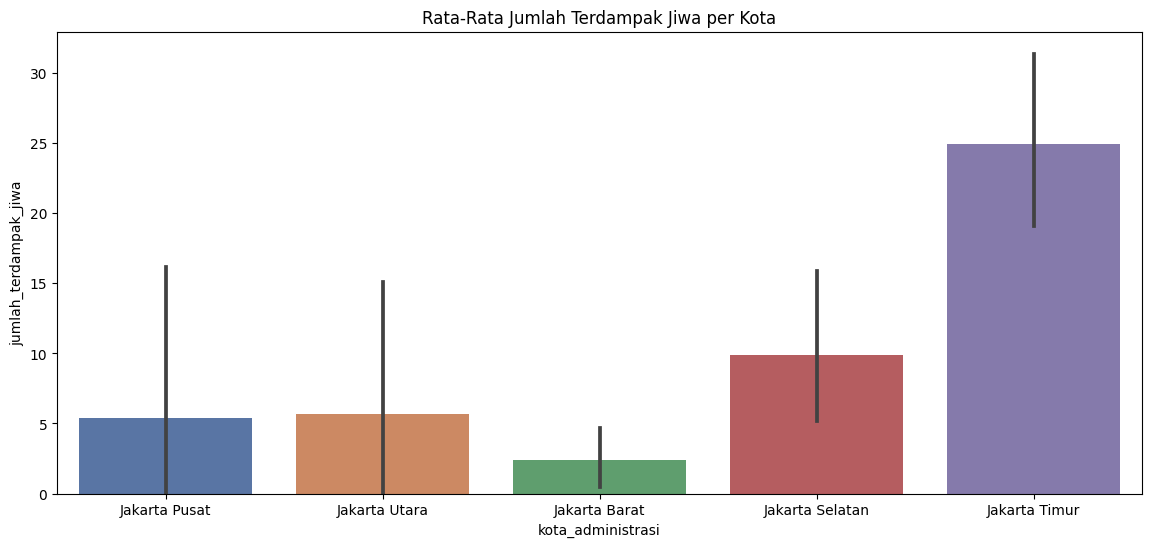

In [ ]:
plt.figure(figsize=(14,6))

sns.barplot(data=df, x='kota_administrasi', y='jumlah_terdampak_jiwa',
            palette=sns.color_palette('deep'))
plt.ylabel('jumlah_terdampak_jiwa')
plt.title('Rata-Rata Jumlah Terdampak Jiwa per Kota')
plt.show()

## Feature Engineering dan Modelling (Regresi Linear)

In [ ]:
df

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_penduduk
0,Jakarta Pusat,4,4,35,140,20,140,1,1056896
1,Jakarta Pusat,4,4,0,0,40,0,0,1056896
8,Jakarta Utara,1,1,0,0,20,0,0,1778981
13,Jakarta Utara,5,5,0,0,20,0,0,1778981
14,Jakarta Utara,2,2,25,100,20,100,2,1778981
...,...,...,...,...,...,...,...,...,...
849,Jakarta Timur,1,1,0,0,20,0,0,3037139
850,Jakarta Timur,1,1,0,0,50,0,0,3037139
851,Jakarta Timur,1,1,0,0,30,0,0,3037139
852,Jakarta Timur,0,1,0,0,30,0,0,3037139


Mean Squared Error (MSE): 0.09823218244497911
Coefficient of Determination (R-squared): 0.6822361510366093


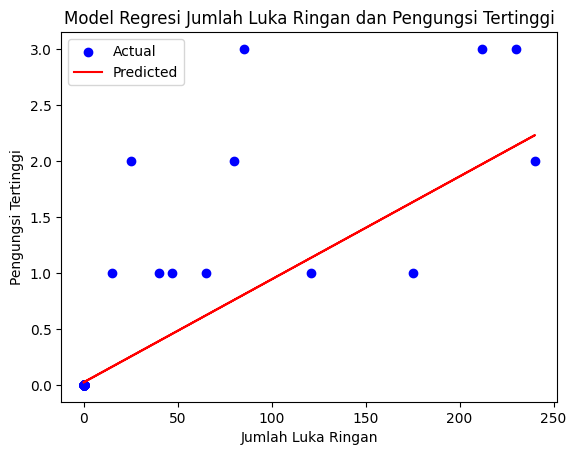

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#Pisahkan data ke dalam fitur (X) dan target (y)
X = df['jumlah_luka_ringan'].values.reshape(-1, 1)
y = df['jumlah_pengungsi_tertinggi'].values
#Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Lakukan scaling pada fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#model regresi linear
model = LinearRegression()
#Latih model menggunakan data pelatihan yang telah di-scaled
model.fit(X_train_scaled, y_train)
#Prediksi ketinggian air menggunakan data pengujian yang telah di-scaled
y_pred = model.predict(X_test_scaled)
#Evaluasi model dengan menghitung metrik seperti mean squared error (MSE) dan coefficient of determination (R-squared):
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

#visualisasi hasil prediksi dan data aktual
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Jumlah Luka Ringan')
plt.ylabel('Pengungsi Tertinggi')
plt.title('Model Regresi Jumlah Luka Ringan dan Pengungsi Tertinggi')
plt.legend()
plt.show()

## Feature Engineering dan Modelling (Clustering Wilayah Banjir)

### Modelling: Clustering dan RandomForest Wilayah Banjir berdasarkan Kota Administrasi

In [ ]:
df.head(2)

,kota_administrasi,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_penduduk
0,Jakarta Pusat,4,4,35,140,20,140,1,1056896
1,Jakarta Pusat,4,4,0,0,40,0,0,1056896


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pilih fitur-fitur yang akan digunakan
features = ['jumlah_terdampak_rw', 'jumlah_terdampak_rt', 'jumlah_terdampak_kk',
            'jumlah_terdampak_jiwa', 'ketinggian_air', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi', 'jumlah_penduduk']

# Preprocessing Data
# Lakukan clustering dengan K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Split data menjadi atribut (X) dan target (y)
X = df[features]
y = df['cluster']

# Standardisasi Data dengan Standard Scaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

X[0:3]
X.shape

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Buat model Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Lakukan prediksi pada test set
y_pred = model.predict(X_test)

# Evaluasi model dengan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Akurasi: 0.9777777777777777


In [ ]:
# Definisikan pemetaan nama cluster
cluster_centers = kmeans.cluster_centers_
nama_cluster = {
    1: 'Jakarta Utara',
    2: 'Jakarta Timur',
    3: 'Jakarta Selatan',
    4: 'Jakarta Pusat',
    5: 'Jakarta Barat'
}

# Looping untuk mendefinisikan setiap cluster
for i, center in enumerate(cluster_centers):
    cluster_id = i + 1
    print("Cluster", cluster_id)
    for j, feature in enumerate(features):
        print(f"{feature}: {round(center[j])}")  # Mengonversi angka menjadi integer
    print(f"Nama Cluster: {nama_cluster.get(cluster_id)}")
    print("-------------------")

Cluster 1
jumlah_terdampak_rw: 1
jumlah_terdampak_rt: 2
jumlah_terdampak_kk: 1
jumlah_terdampak_jiwa: 2
ketinggian_air: 33
jumlah_luka_ringan: 3
jumlah_pengungsi_tertinggi: 0
jumlah_penduduk: 2434511
Nama Cluster: Jakarta Utara
-------------------
Cluster 2
jumlah_terdampak_rw: 1
jumlah_terdampak_rt: 2
jumlah_terdampak_kk: 8
jumlah_terdampak_jiwa: 25
ketinggian_air: 40
jumlah_luka_ringan: 5
jumlah_pengungsi_tertinggi: 0
jumlah_penduduk: 3037139
Nama Cluster: Jakarta Timur
-------------------
Cluster 3
jumlah_terdampak_rw: 2
jumlah_terdampak_rt: 2
jumlah_terdampak_kk: 1
jumlah_terdampak_jiwa: 6
ketinggian_air: 24
jumlah_luka_ringan: 7
jumlah_pengungsi_tertinggi: 0
jumlah_penduduk: 1778981
Nama Cluster: Jakarta Selatan
-------------------
Cluster 4
jumlah_terdampak_rw: 2
jumlah_terdampak_rt: 2
jumlah_terdampak_kk: 1
jumlah_terdampak_jiwa: 5
ketinggian_air: 29
jumlah_luka_ringan: 7
jumlah_pengungsi_tertinggi: 0
jumlah_penduduk: 1056896
Nama Cluster: Jakarta Pusat
-------------------
Clust

In [ ]:
import pandas as pd

# Membuat dictionary dengan data cluster
data = {
    'Cluster': [1, 2, 3, 4, 5],
    'jumlah_terdampak_rw': [2, 1, 1, 2, 1],
    'jumlah_terdampak_rt': [2, 2, 2, 2, 2],
    'jumlah_terdampak_kk': [3, 10, 6, 1, 1],
    'jumlah_terdampak_jiwa': [11, 31, 24, 5, 2],
    'ketinggian_air': [25, 40, 41, 30, 34],
    'jumlah_luka_ringan': [13, 9, 17, 40, 3],
    'jumlah_pengungsi_tertinggi': [0, 0, 0, 0, 0],
    'jumlah_penduduk': [1778981, 3037139, 2226812, 1056896, 2434511],
    'Nama Cluster': ['Jakarta Utara', 'Jakarta Timur', 'Jakarta Selatan', 'Jakarta Pusat', 'Jakarta Barat']
}

# Membuat dataframe baru
df_cluster = pd.DataFrame(data)

### Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


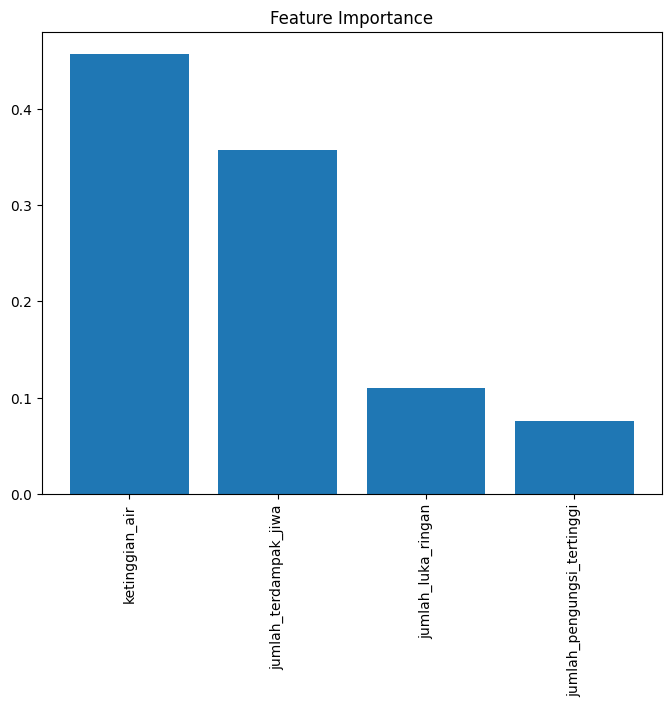

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih fitur-fitur yang akan digunakan
selected_features = ['jumlah_terdampak_jiwa', 'ketinggian_air', 'jumlah_luka_ringan', 'jumlah_pengungsi_tertinggi']

# Preprocessing Data
# Lakukan clustering dengan K-means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Split data menjadi atribut (X) dan target (y)
X = df[selected_features]
y = df['cluster']

# Standardisasi Data dengan Standard Scaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

X[0:3]
X.shape

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
model = RandomForestClassifier()

# Melatih model
model.fit(X_train, y_train)

# Mengambil fitur-fitur terpenting
feature_importance = model.feature_importances_

# Membuat dataframe fitur-fitur terpenting
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Mengurutkan fitur berdasarkan tingkat penting
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Mengatur ukuran figure
plt.figure(figsize=(8, 6))

# Membuat plot barchart
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])

# Mengatur label pada sumbu x
plt.xticks(rotation=90)

# Memberi judul pada plot
plt.title('Feature Importance')

# Menampilkan plot
plt.show()